# Mini Project: Data Visualization With Pandas, Seaborn, And Matplotlib

## Dataset
We will use the “Palmer Penguins” dataset, a popular dataset for data exploration and visualization. It contains various measurements for three species of penguins from Palmer Station, Antarctica.
Project Overview
In this mini project, you will explore, analyze, and visualize a real-world dataset using Python libraries: Pandas for data manipulation, Seaborn for statistical visualizations, and Matplotlib for additional customization. The goal is to extract meaningful insights from the data through visual analysis.

### Data Loading and general information about the dataset

In [1]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
url = 'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv'
penguins = pd.read_csv(url)
penguins.info()
penguins.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007


In [3]:
# the number of missing values in each column
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [4]:
# checking for duplicate strings
penguins.duplicated().sum()

0

In [5]:
penguins['bill_length_mm'].describe()

count    342.000000
mean      43.921930
std        5.459584
min       32.100000
25%       39.225000
50%       44.450000
75%       48.500000
max       59.600000
Name: bill_length_mm, dtype: float64

In [6]:
penguins['bill_depth_mm'].describe()

count    342.000000
mean      17.151170
std        1.974793
min       13.100000
25%       15.600000
50%       17.300000
75%       18.700000
max       21.500000
Name: bill_depth_mm, dtype: float64

In [7]:
penguins['flipper_length_mm'].describe()

count    342.000000
mean     200.915205
std       14.061714
min      172.000000
25%      190.000000
50%      197.000000
75%      213.000000
max      231.000000
Name: flipper_length_mm, dtype: float64

In [8]:
penguins['body_mass_g'].describe()

count     342.000000
mean     4201.754386
std       801.954536
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4750.000000
max      6300.000000
Name: body_mass_g, dtype: float64

In [9]:
print(penguins['sex'].value_counts())
print('-----')
print(penguins['species'].value_counts())
print('-----')
print(penguins['island'].value_counts())
print('-----')
penguins['year'].value_counts()

male      168
female    165
Name: sex, dtype: int64
-----
Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64
-----
Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64
-----


2009    120
2008    114
2007    110
Name: year, dtype: int64

<div style="border:solid green 2px; padding: 20px">
 
**This dataset contains the following data:**
    
- This dataset containes various measurements for three species of penguins (Adelie, Gentoo, Chinstrap) from Palmer Station, Antarctica, such as bill length, bill depth, flipper_length, body mass. 
- The information was collected on three islands: Biscoe, Dream, Chinstrap for three years: 2007, 2008, 2009.
- It contains 8 columns and 344 rows. Only column "year" has an integer type instead of a date, the remaining columns have the correct types.
- There are no large outliers in the numeric columns, all data is uniform. Penguins are also evenly distributed across the sex.
- There are no duplicates in the dataset.
- There are 11 missing values in the "sex" column, two missing values each in the columns "bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g". Rows with missing values should be deleted from the dataset, because without this information, it is impossible to analyze the data. And the number of deleted rows will be about 3% of the entire dataset, which will not affect the quality of data analysis.

### Data preprocessing

In [13]:
# converting a column type to a date and float
penguins['year'] = pd.to_datetime(penguins['year'], format='%Y')

# Deleting rows with missing values in all columns
penguins_filtered = penguins.dropna(subset=["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]).reset_index(drop=True)
len(penguins_filtered)

342

In [15]:
penguins_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   species            342 non-null    object        
 1   island             342 non-null    object        
 2   bill_length_mm     342 non-null    float64       
 3   bill_depth_mm      342 non-null    float64       
 4   flipper_length_mm  342 non-null    float64       
 5   body_mass_g        342 non-null    float64       
 6   sex                333 non-null    object        
 7   year               342 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 21.5+ KB


In [17]:
penguins_filtered['year'] = penguins_filtered['year'].dt.year
penguins_filtered.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
5,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
6,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
7,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
8,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007
9,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,2007


<div style="border:solid green 2px; padding: 20px">
    The column "year" has been converted to date format, and two rows with missing values have been deleted from the dataset.

### Exploratory Data Analysis (EDA):

Use Pandas to summarize the key statistics of the dataset.
Identify unique values, ranges, and distribution of data.

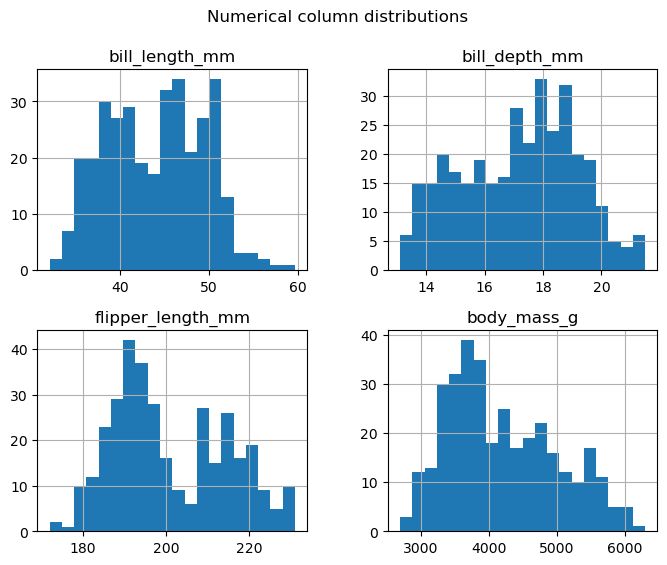

In [21]:
# Distribution of numerical columns without creating an additional variable
penguins_filtered[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].hist(bins=20, figsize=(8, 6))
plt.suptitle('Numerical column distributions')
plt.show()

<div style="border:solid green 2px; padding: 20px">
    The length of the beak of penguins is most often in the range from 30 to 55 mm, the depth of the beak is from 12 to 20 mm, the length of the flippers is from 185 to 200 and from 210 to 225 mm, the body weight is from 3300 to 5000 grams.

## Visualization Tasks

### Species Distribution: Show the distribution of penguin species

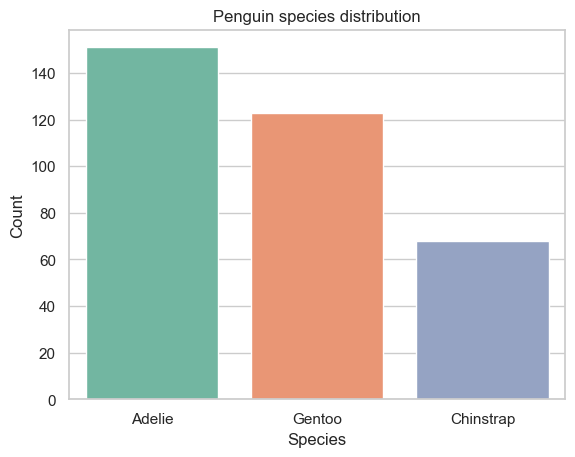

In [30]:
# Plotting the countplot 
sns.set(style="whitegrid")
sns.countplot(x='species', data=penguins_filtered, palette='Set2')
plt.title('Penguin species distribution')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

<div style="border:solid green 2px; padding: 20px">
    The most penguins are of the Adelie species, the least of all are Chinstrap.

### Flipper Length vs. Body Mass: Create a scatter plot to analyze the relationship between flipper length and body mass, color-coded by species

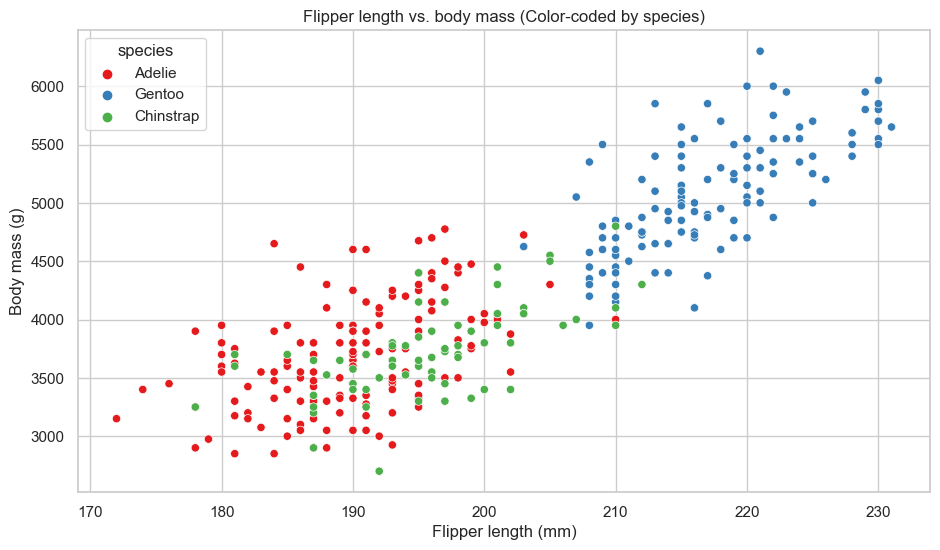

In [31]:
# Scatter plot with color-coded points for each species using Seaborn
plt.figure(figsize=(11, 6))
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', hue='species', palette='Set1', data=penguins_filtered)
plt.title('Flipper length vs. body mass (Color-coded by species)')
plt.xlabel('Flipper length (mm)')
plt.ylabel('Body mass (g)')
plt.show()

<div style="border:solid green 2px; padding: 20px">
    Penguins of the Adelie and Chinstrap species have approximately equal weight and fin length. Gentoo penguins weigh significantly more and have longer flippers. In general, the greater the penguin's body mass, the longer the flippers.

### Island Distribution: Visualize the count of penguins on each island using a pie chart

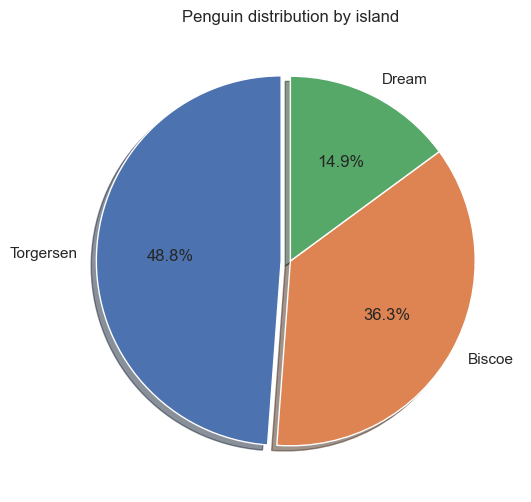

In [34]:
# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(penguins_filtered['island'].value_counts(), labels=penguins_filtered['island'].unique(), autopct='%1.1f%%', startangle=90, explode=(0.05, 0, 0), shadow=True)
plt.title('Penguin distribution by island')
plt.show()

<div style="border:solid green 2px; padding: 20px">
    Almost half of the penguins, information about which is available in the dataset, live on the island of Torgersen. The least penguins live on Dream Island (14.9%).

### Sex Distribution within Species: Create grouped bar charts showing the distribution of sex within each penguin species

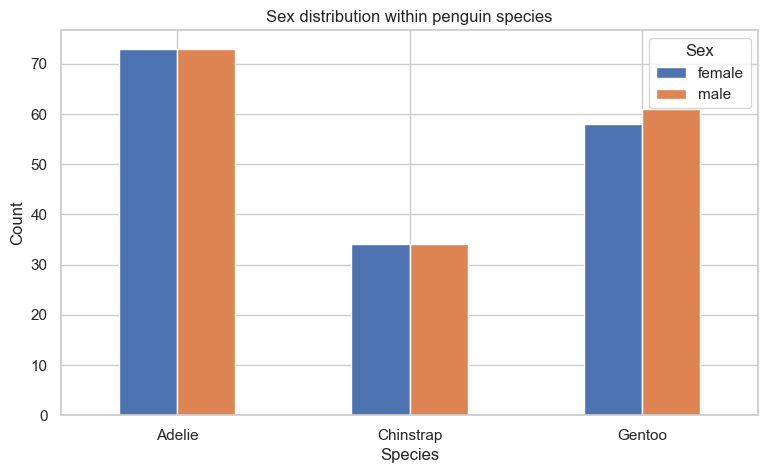

In [37]:
# Create a grouped bar chart for sex distribution within each species
species_sex_counts = penguins_filtered.groupby(['species', 'sex']).size().unstack()

# Plotting the grouped bar chart
species_sex_counts.plot(kind='bar', stacked=False, figsize=(9, 5))
plt.title('Sex distribution within penguin species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.legend(title='Sex', loc='upper right')
plt.xticks(rotation=0)
plt.show()

<div style="border:solid green 2px; padding: 20px">
    Adelie and Chinstrap penguins have the same number of males and females. Gentoo has a little more male.

### Heatmap of Correlations: Plot a heatmap to visualize the correlations between numerical variables

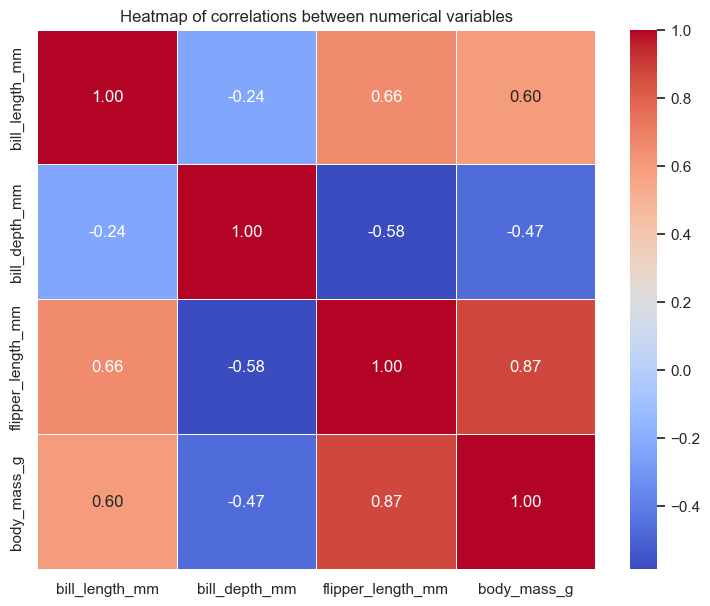

In [39]:
# Plotting the heatmap of correlations between numerical variables
plt.figure(figsize=(9, 7))
sns.heatmap(penguins_filtered[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].corr(),
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of correlations between numerical variables')
plt.show()

<div style="border:solid green 2px; padding: 20px">
    The strongest correlation between the length of the flippers and the penguin's body mass is 0.87. There is also a fairly large correlation between the length of the bill and the length of the flippers - 0.66, the length of the bill and body mass - 0.60. The least correlation between the length of the bill and the depth of the bill is the inverse correlation -0.24.

### Boxplots for Measurements: Generate boxplots for flipper length, body mass, and bill measurements, segmented by species

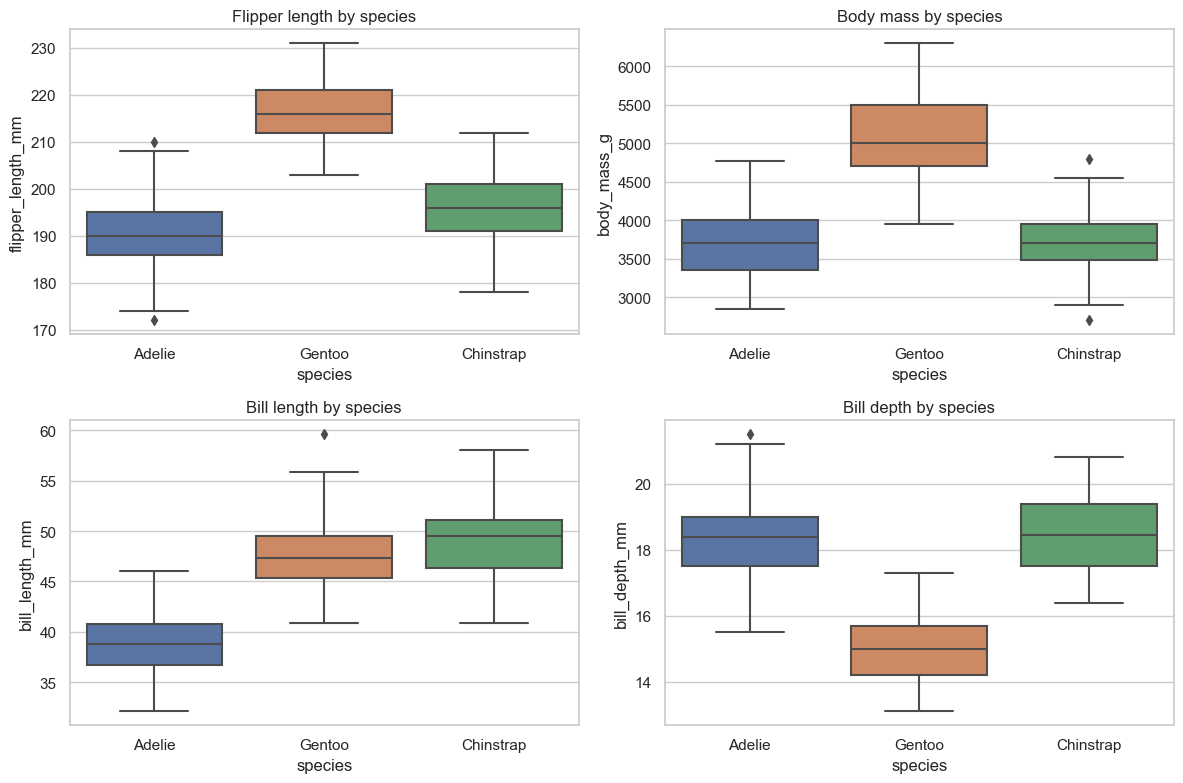

In [40]:
# Set up a boxplot for measurements segmented by species
plt.figure(figsize=(12, 8))

# Flipper Length
plt.subplot(2, 2, 1)
sns.boxplot(x='species', y='flipper_length_mm', data=penguins_filtered)
plt.title('Flipper length by species')

# Body Mass
plt.subplot(2, 2, 2)
sns.boxplot(x='species', y='body_mass_g', data=penguins_filtered)
plt.title('Body mass by species')

# Bill Length
plt.subplot(2, 2, 3)
sns.boxplot(x='species', y='bill_length_mm', data=penguins_filtered)
plt.title('Bill length by species')

# Bill Depth
plt.subplot(2, 2, 4)
sns.boxplot(x='species', y='bill_depth_mm', data=penguins_filtered)
plt.title('Bill depth by species')

plt.tight_layout()
plt.show()

<div style="border:solid green 2px; padding: 20px">
    The length of the flippers and body mass are most common in Gentoo penguins, while these indicators are approximately equal in the other two species. The length and depth of the bill are most common in Chinstrap penguins. At the same time, the length of the bill is almost the same in Gentoo, and the depth of the bill in this penguin species is the least, and in the Adelie species this indicator is almost the same as in Chinstrap.

### Histograms of Measurements: Create histograms to show the distribution of key measurements (bill length, bill depth, flipper length)

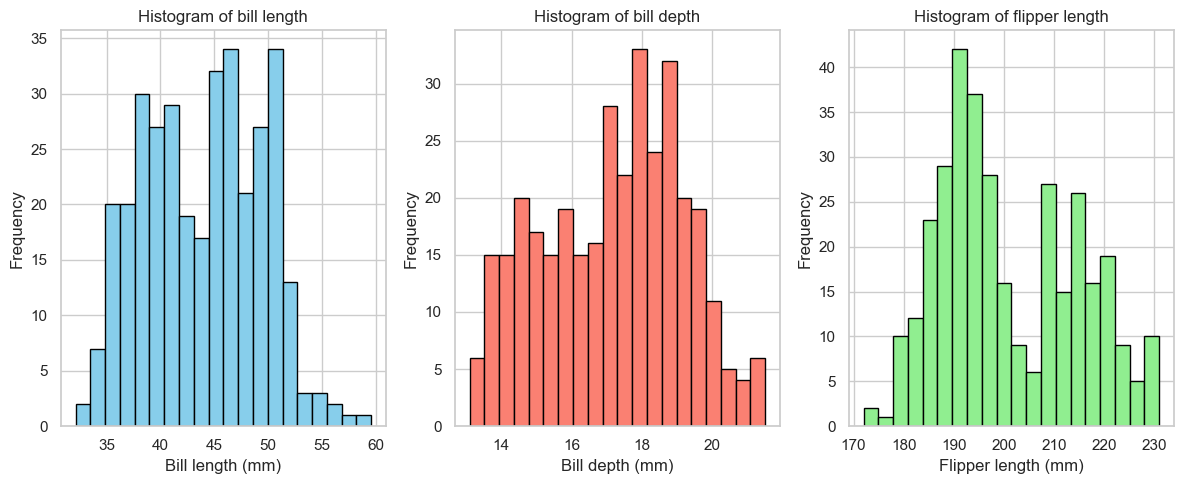

In [42]:
# Set up histograms for key measurements
plt.figure(figsize=(12, 5))

# Bill Length
plt.subplot(1, 3, 1)
plt.hist(penguins_filtered['bill_length_mm'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of bill length')
plt.xlabel('Bill length (mm)')
plt.ylabel('Frequency')

# Bill Depth
plt.subplot(1, 3, 2)
plt.hist(penguins_filtered['bill_depth_mm'], bins=20, color='coral', edgecolor='black')
plt.title('Histogram of bill depth')
plt.xlabel('Bill depth (mm)')
plt.ylabel('Frequency')

# Flipper Length
plt.subplot(1, 3, 3)
plt.hist(penguins_filtered['flipper_length_mm'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram of flipper length')
plt.xlabel('Flipper length (mm)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<div style="border:solid green 2px; padding: 20px">
    The distribution of these indicators is close to normal, there are practically no abnormal values. Only in the indicator of the length of the flippers is there a gap in the values - there are almost no values in the range of 202-205 mm.

## Insightful Visualizations

### Combine multiple plots into a single figure (using subplots) to compare different aspects of the data

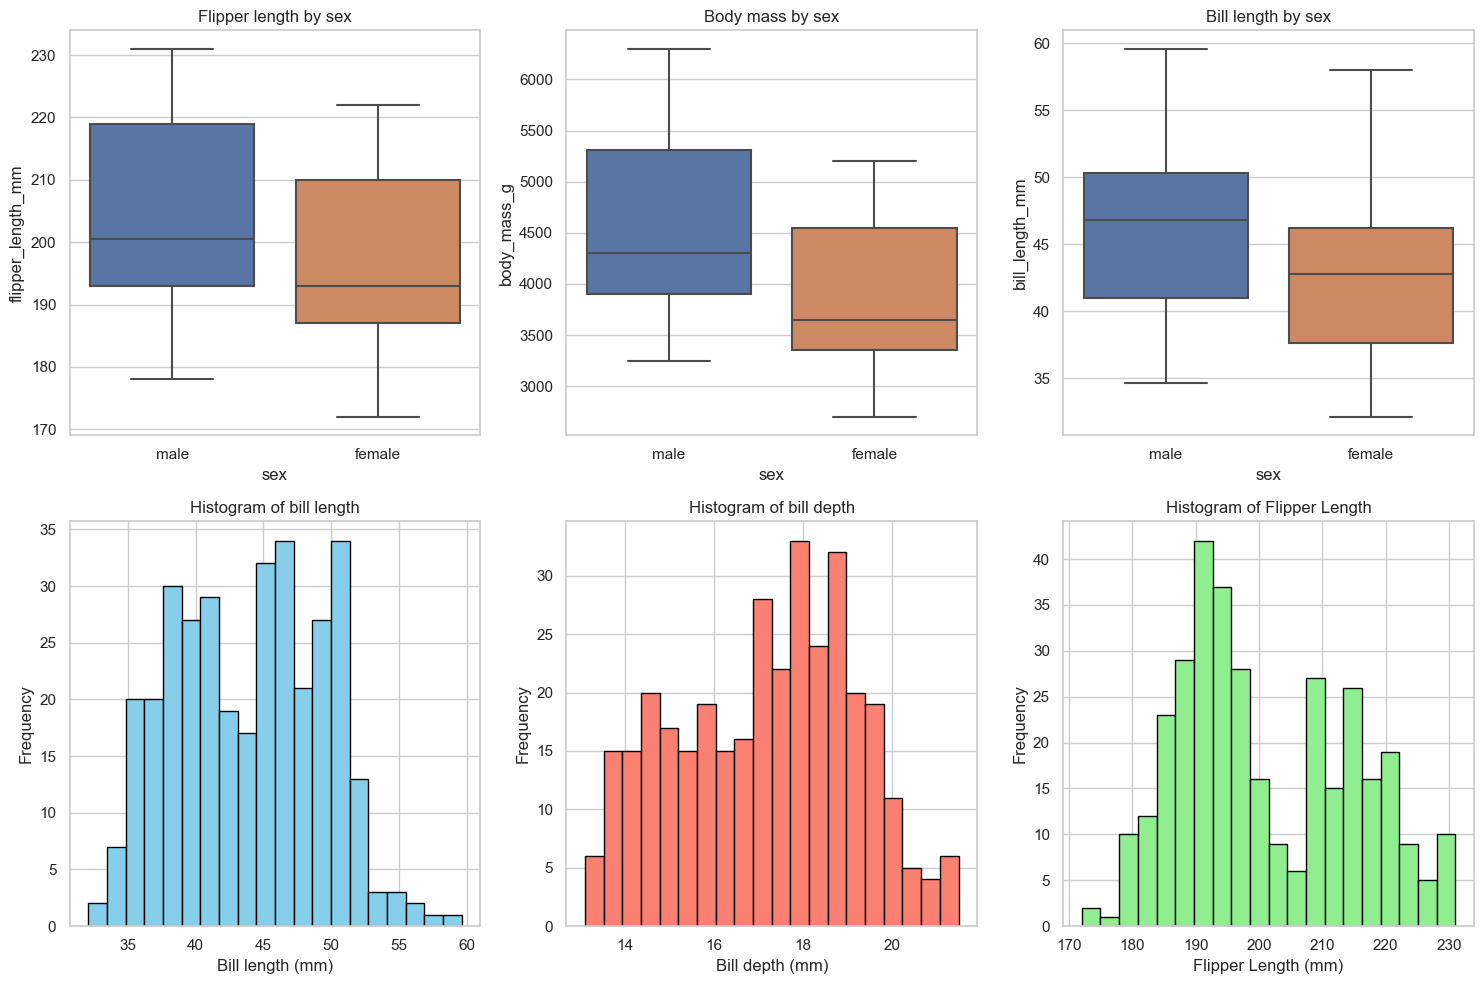

In [45]:
# Set up a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Boxplots for measurements segmented by sex
sns.boxplot(x='sex', y='flipper_length_mm', data=penguins_filtered, ax=axes[0, 0])
axes[0, 0].set_title('Flipper length by sex')

sns.boxplot(x='sex', y='body_mass_g', data=penguins_filtered, ax=axes[0, 1])
axes[0, 1].set_title('Body mass by sex')

sns.boxplot(x='sex', y='bill_length_mm', data=penguins_filtered, ax=axes[0, 2])
axes[0, 2].set_title('Bill length by sex')

# Histograms for key measurements
axes[1, 0].hist(penguins_filtered['bill_length_mm'], bins=20, color='skyblue', edgecolor='black')
axes[1, 0].set_title('Histogram of bill length')
axes[1, 0].set_xlabel('Bill length (mm)')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].hist(penguins_filtered['bill_depth_mm'], bins=20, color='salmon', edgecolor='black')
axes[1, 1].set_title('Histogram of bill depth')
axes[1, 1].set_xlabel('Bill depth (mm)')
axes[1, 1].set_ylabel('Frequency')

axes[1, 2].hist(penguins_filtered['flipper_length_mm'], bins=20, color='lightgreen', edgecolor='black')
axes[1, 2].set_title('Histogram of Flipper Length')
axes[1, 2].set_xlabel('Flipper Length (mm)')
axes[1, 2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

<div style="border:solid green 2px; padding: 20px">
    Male penguins usually have a longer bill and fins, and body weight.

### Use Seaborn’s pairplot to visualize pairwise relationships in the dataset

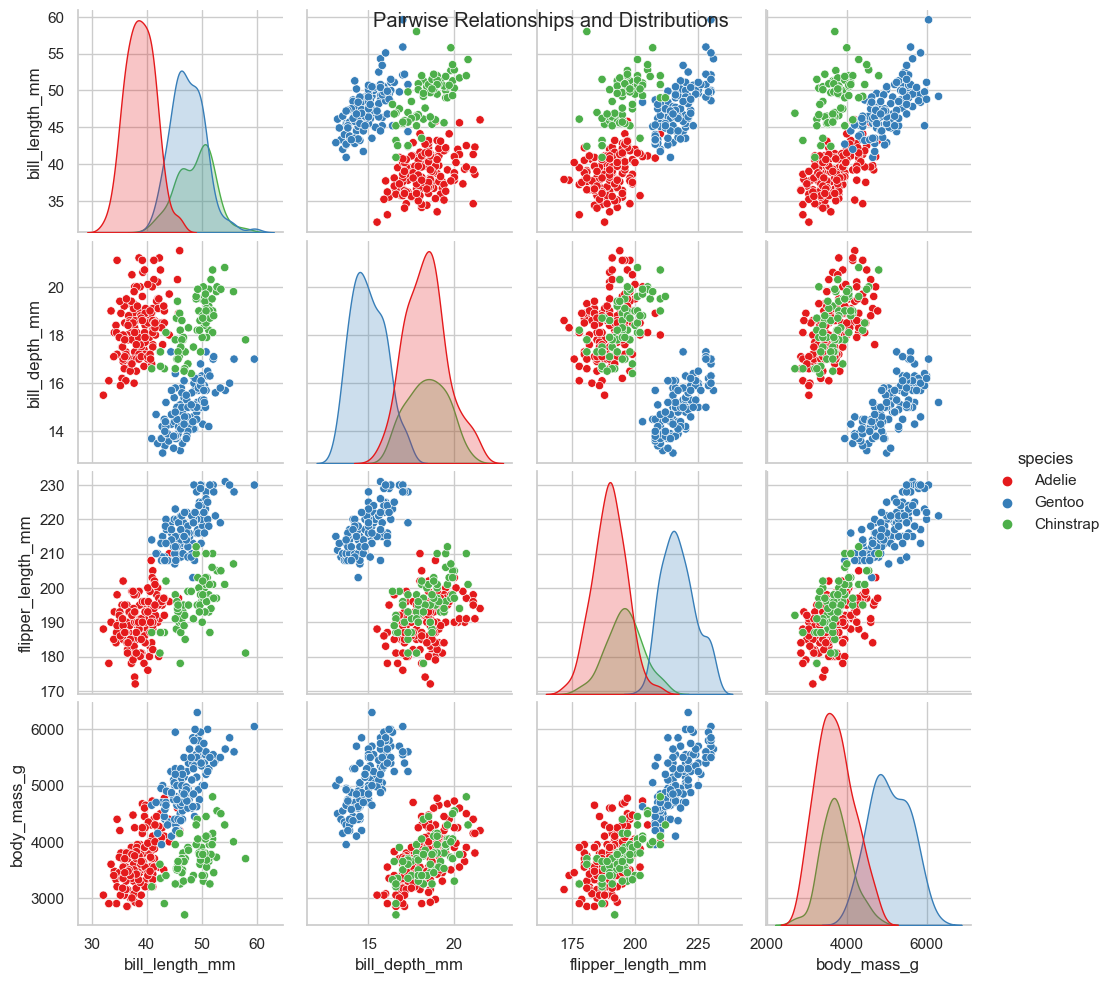

In [49]:
# Create a pairplot
sns.pairplot(penguins_filtered[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'species']],
             diag_kind='kde', hue='species', palette='Set1')
plt.suptitle('Pairwise relationships and distributions')
plt.show()

<div style="border:solid green 2px; padding: 20px">
    These graphs confirm earlier conclusions that the numerical values are evenly distributed and there are almost no outliers; Gentoo penguins have the largest body mass and flipper length.

## Conclusion

<div style="border:solid green 2px; padding: 20px">
    
- The dataset presents data on the penguin population for 2007, 2008 and 2009. 
- The dataset examines three species of penguins: Adelie, Gentoo, Chinstrap, living on three islands in Antarctica: Biscoe, Dream and Torgersen.
- In all numeric columns, the data is almost uniform and there are almost no abnormal values.
- A strong correlation was revealed between body mass and flippers length, between length of the bill and the length of the flippers, the length of the bill and body mass.
- Male penguins are usually larger than females.